# Developer Salary 程序员工资调查
我在4月1日到3日之间，抓取了某招聘网站的软件和互联网类招聘数据40万条，其中通过程序判断为程序员的14万条。地域方面，我选择了24个主要城市。不过本文只以一线城市为研究对象。这样是为了和我2017年6月的数据做对比。

提到2017年的文章，现在居然还有很多人，把这篇文章拿出来炒作。对于社会来说，可气的是，他们直接把2017改成2019，就发表了，这不是骗人么？！对于我来说，可气的是，他们转载居然还冒充是原创，是可忍熟不可忍！

In [1]:
import pandas as pd
import sys
sys.path.append('..')
sys.path.append('../py')
import db
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns
import scipy.stats as stats
import numpy as np
import weighted
%matplotlib inline

In [3]:
conn=db.get_conn()
data_original=pd.read_sql(sql="select * from _201903v2 where monthly_salary>0 and monthly_salary<80000 and YEAR(publish_date)=2019 and MONTH(publish_date)=3", con=conn)
conn.close()

In [4]:
error_job_ids=['104660258','104142922','108434795','101357291','106253516','110368302','111391233','108665401','109277048'
                  ,'73857191','108584955','102824950','102824949','111391233','110884556']
data=data_original[~data_original.job_id.isin(error_job_ids)]

In [5]:
#del data['publish_date']
#del data['published_on_weekend']
#del data['title']
#del data['title']
#del data['company_title']
#del data['company_description']
#del data['job_description']
#del data['job_id']

In [6]:
data=data.sort_values(by='headcount', ascending=False)
data.head()

,job_id,monthly_salary,headcount,title,career,city,company_description,company_size,company_title,company_type,...,pl_visual_basic,publish_date,published_on_weekend,tag_baby_care,tag_five_insurance,tag_flexible,tag_no_overtime,tag_rest_one_day,tag_rest_two_days,tag_stock
19021,109606295,7000.0,450,网游公司招聘（游戏推广、维护、设计）,一般程序员,guangzhou,广州川山教育是集远程高等学历教育、职业化教育、各类培训考证于一体的综合性教育机构。自成立以来...,50-,广州川山教育科技有限公司,民营公司,...,False,2019-03-13,False,False,False,False,False,False,False,False
27335,110969579,12500.0,200,JAVA开发工程师（2019届应届毕业生）,一般程序员,guangzhou,广州汇智通信技术有限公司是专业从事国家特殊通信系统研制工作的大型国有控股混合所有制企业。公司...,1000-5000,广州汇智通信技术有限公司,国企,...,False,2019-03-31,True,False,True,False,False,False,False,False
38024,75596794,7500.0,200,JAVA 工程师,一般程序员,shenzhen,四方精创资讯有限公司（简称四方精创），是从事金融行业it综合服务和软件协同服务的高端应用软件...,500-1000人,深圳四方精创资讯股份有限公司,合资,...,False,2019-03-26,False,False,True,False,False,False,False,False
42889,93944455,5000.0,180,2018届毕业生（计算机、软件）,一般程序员,nanjing,江苏海隆是由中国知名的服务外包企业海隆软件投资成立的，海隆软件总部设于上海，注册资金3亿元，...,1000-5000,江苏海隆软件技术有限公司,民营公司,...,False,2019-03-19,False,False,True,True,False,False,False,False
42901,93977548,5000.0,180,储备海外业务软件工程师（2018届应届生）,一般程序员,nanjing,江苏海隆是由中国知名的服务外包企业海隆软件投资成立的，海隆软件总部设于上海，注册资金3亿元，...,1000-5000,江苏海隆软件技术有限公司,民营公司,...,False,2019-03-19,False,False,True,True,False,False,False,False


In [7]:
def pd_weighted_mean(group, avg_name, weight_name):
    """ http://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns
    In rare instance, we may not have weights, so just return the mean. Customize this if your business case
    should return otherwise.
    """
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()


# Unilateral Stats 总体统计

有数据可知，程序员向一线城市集中的趋势非常明显。

According to the statistics, significant amount of developers are in the first tier cities.

In [8]:
salary_mean=weighted.weighted_mean(data.monthly_salary.values, data.headcount.values)
q=weighted.weighted_quantile(data.monthly_salary.values,[0.025,0.25,0.5,0.75,0.975], data.headcount.values)
q

array([ 3750.,  9000., 12500., 17500., 33750.])

In [9]:
print('2019年中国程序员的平均工资为{:.0f}元，工资中位数为{:.0f}元，其中95%的人的工资位于{:.0f}到{:.0f}元之间。'
      .format(salary_mean, q[2], q[0], q[4]))

2019年中国程序员的平均工资为13769元，工资中位数为12500元，其中95%的人的工资位于3750到33750元之间。


In [10]:
print('In 2019, Developers in China earn {:.0f} Yuan as average, '
      'the median is {:.0f} Yuan, 95% of them earn between {:.0f} and {:.0f} Yuan.'
      .format(salary_mean, q[2], q[0], q[4]))

In 2019, Developers in China earn 13769 Yuan as average, the median is 12500 Yuan, 95% of them earn between 3750 and 33750 Yuan.


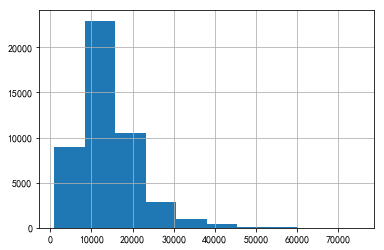

In [11]:
data.monthly_salary.hist()

It does not look like normal distribution.

In [12]:
from scipy import stats

In [13]:
stats.normaltest(data.monthly_salary)

NormaltestResult(statistic=16697.978628531244, pvalue=0.0)

null hypothesis: x comes from a normal distribution
    
p=0

The null hypothesis can be rejected

conclusion: data is not normally distributed.

Zoom in

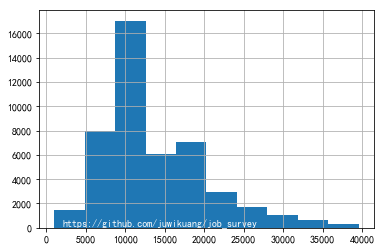

In [14]:
data[data.monthly_salary<40000].monthly_salary.hist()
plt.annotate('https://github.com/juwikuang/job_survey', xy=(0,0), xytext=(2000, 100), color='white')
plt.show()

## Role 角色

In [15]:
#Common Functions
def get_sub_stats_by_col(data, col):
    categories=data[col].unique()
    salary_mean=[]
    salary_95_min=[]
    salary_95_max=[]
    salary_median=[]

    count=[]
    
    categorys_out=[]
    for category in categories:
        #print(feature)
        idata=data[data[col]==category]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(np.average(values, weights=weights))
        

        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_95_min.append(q[0])
        salary_median.append(q[1])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        categorys_out.append(category)
    sub_data=pd.DataFrame()
    sub_data[col]=[c for c in categorys_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_median']=salary_median
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)

    return sub_data

def get_sub_stats_by_prefix(data, prefix):
    
    features = [feature for feature in data.columns if feature.startswith(prefix)]
    salary_mean=[]
    salary_median=[]
    salary_95_min=[]
    salary_95_max=[]
    count=[]
    
    features_out=[]
    for feature in features:
        #print(feature)
        idata=data[data[feature]==1]
        headcount=idata.headcount.sum()
        values = idata.monthly_salary.values
        weights = idata.headcount.values
        #print(str(headcount))
        if headcount==0:
            continue
        
        salary_mean.append(weighted.weighted_mean(values, weights))
        q = weighted.weighted_quantile(values,[0.025,0.5,0.975],weights)
        salary_median.append(q[1])
        salary_95_min.append(q[0])
        salary_95_max.append(q[2])
        count.append(idata.headcount.sum())
        features_out.append(feature)
    sub_data=pd.DataFrame()
    sub_data['rank']=range(0,len(features_out))
    sub_data[prefix]=[f.replace(prefix,'') for f in features_out]
    sub_data['salary_mean']=salary_mean
    sub_data['salary_median']=salary_median
    sub_data['salary_95_min']=salary_95_min
    sub_data['salary_95_max']=salary_95_max
    sub_data['head_count']=count
    sub_data['percentage']=count/np.sum(count)
    sub_data=sub_data.sort_values(by='salary_mean', ascending=False)
    sub_data['rank']=range(1,len(features_out)+1)
    #sub_data=sub_data.reset_index()
    return sub_data

def apply_style(sub_data):
    return sub_data.style.hide_index().format(
        {"percentage":"{:.2%}","salary_mean":"{:.0f}","salary_median":"{:.0f}","salary_95_min":"{:.0f}","salary_95_max":"{:.0f}"})

In [16]:
data_career = get_sub_stats_by_col(data,'career')
apply_style(data_career)

career,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
算法工程师,20747,5000,17917,58333,13869,8.62%
系统架构师,19803,5250,17500,45000,7379,4.59%
爬虫工程师,14799,3333,14000,35000,300,0.19%
一般程序员,12753,3750,12500,30000,139230,86.57%
生物信息工程师,10518,4500,9750,22500,55,0.03%


In [17]:
np.sum(data.monthly_salary * data.headcount) / data.headcount.sum()

13768.992319155064

In [18]:
data.headcount.sum()

160833

In [19]:
data.headcount.describe()

count    46808.000000
mean         3.436015
std          4.840314
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        450.000000
Name: headcount, dtype: float64

In [20]:
pd.options.display.max_columns=100
data.sort_values(by='headcount', ascending=False).head()

,job_id,monthly_salary,headcount,title,career,city,company_description,company_size,company_title,company_type,ageism,db_Apache_Hive,db_CouchBase,db_CouchDB,db_DB2,db_DynamoDB,db_Elasticsearch,db_FileMaker,db_Firebase,db_Firebird,db_Hbase,db_Informix,db_Ingres,db_MariaDB,db_Memcached,db_MongoDB,db_MySQL,db_Neo4j,db_Netezza,db_Oracle,db_PostgreSQL,db_Redis,db_Riak,db_SAP_HANA,db_SQL_Server,db_SQLite,db_Solr,db_Splunk,db_Sybase,db_Teradata,db_dBase,edu,english,experience,expert_adas,expert_blockchain,expert_embed,expert_expert,expert_gis,_996_yes,_996_no,industry,japanese,job_description,job_summary,job_tags,phone_android,phone_app,phone_iso,pl_c_sharp,pl_cpp,pl_delphi,pl_go,pl_haskell,pl_java,pl_javascript,pl_julia,pl_kotlin,pl_lua,pl_matlab,pl_objective_c,pl_perl,pl_php,pl_python,pl_ruby,pl_rust,pl_scrala,pl_swift,pl_typescript,pl_vba,pl_visual_basic,publish_date,published_on_weekend,tag_baby_care,tag_five_insurance,tag_flexible,tag_no_overtime,tag_rest_one_day,tag_rest_two_days,tag_stock
19021,109606295,7000.0,450,网游公司招聘（游戏推广、维护、设计）,一般程序员,guangzhou,广州川山教育是集远程高等学历教育、职业化教育、各类培训考证于一体的综合性教育机构。自成立以来...,50-,广州川山教育科技有限公司,民营公司,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,大专,False,no,False,False,False,False,False,False,True,edu,False,月薪3500-8000底薪+补助+社保、五险一金、部分双休。部门免费包住，2.工作地点：可申...,广州-天河区|无工作经验|大专|招450人|03-13发布,"绩效奖金,全勤奖,专业培训,节日福利",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-03-13,False,False,False,False,False,False,False,False
27335,110969579,12500.0,200,JAVA开发工程师（2019届应届毕业生）,一般程序员,guangzhou,广州汇智通信技术有限公司是专业从事国家特殊通信系统研制工作的大型国有控股混合所有制企业。公司...,1000-5000,广州汇智通信技术有限公司,国企,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,本科,False,no,False,False,False,False,False,True,False,computer,False,广州汇智通信技术有限公司 ...,广州|无工作经验|本科|招200人|03-31发布,"五险一金,补充医疗保险,补充公积金,交通补贴,年终奖金,绩效奖金,通讯补贴,定期体检,餐饮补贴",False,True,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-03-31,True,False,True,False,False,False,False,False
38024,75596794,7500.0,200,JAVA 工程师,一般程序员,shenzhen,四方精创资讯有限公司（简称四方精创），是从事金融行业it综合服务和软件协同服务的高端应用软件...,500-1000人,深圳四方精创资讯股份有限公司,合资,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,本科,False,1_3,False,False,False,False,False,False,False,computer,False,岗位职责1.按照上级计划和安排进行技术开发工作；2. 负责金融行业应用平台后端模块开发工作；...,深圳|1年经验|本科|招200人|03-26发布,"五险一金,专业培训,年终奖金,员工旅游",False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-03-26,False,False,True,False,False,False,False,False
42889,93944455,5000.0,180,2018届毕业生（计算机、软件）,一般程序员,nanjing,江苏海隆是由中国知名的服务外包企业海隆软件投资成立的，海隆软件总部设于上海，注册资金3亿元，...,1000-5000,江苏海隆软件技术有限公司,民营公司,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,本科,True,no,False,False,False,False,False,False,True,computer,True,职位描述：1. 从事对日大型应用软件（证券、保险、银行、交通等）系统的详细设计、开发和测试等...,南京-鼓楼区|无工作经验|本科|招180人|03-19发布|英语良好|计算机科学与技术计算机网络,"五险一金,员工旅游,交通补贴,餐饮补贴,专业培训,出国机会,绩效奖金,年终奖金,弹性工作,定期体检",False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2019-03-19,False,False,True,True,False,False,False,False
42901,93977548,5000.0,180,储备海外业务软件工程师（2018届应届生）,一般程序员,nanjing,江苏海隆是由中国知名的服务外包企业海隆软件投资成立的，海隆软件总部设于上海，注册资金3亿元，...,1000-5000,江苏海隆软件技术有限公司,民营公司,False,False,False,False,False,False,False,Fal

# 城市

In [21]:
data_pl=get_sub_stats_by_col(data,'city')
apply_style(data_pl)

city,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
beijing,16277,3750,13000,40000,28346,17.62%
shanghai,15842,5250,14583,35000,33078,20.57%
shenzhen,15324,5250,13500,33333,19659,12.22%
hangzhou,15024,3750,12500,35000,8508,5.29%
chengdu,12653,3750,11500,30000,7522,4.68%
guangzhou,12602,3750,11500,30000,15715,9.77%
nanjing,12386,5000,11500,28475,8743,5.44%
tianjin,12241,3750,10885,30000,1122,0.70%
ningbo,11237,3750,9500,29167,1002,0.62%
xian,11030,3750,10000,27500,3934,2.45%


# 编程语言

In [22]:
data_pl=get_sub_stats_by_prefix(data,'pl_')
apply_style(data_pl)


rank,pl_,salary_mean,salary_median,salary_95_min,salary_95_max,head_count,percentage
1,haskell,27772,30667,7544,45000,41,0.02%
2,julia,26875,26875,17500,30000,4,0.00%
3,rust,19567,17000,6500,45833,242,0.11%
4,python,18315,16000,4000,42500,17854,8.04%
5,matlab,18285,17500,5000,40000,3304,1.49%
6,perl,17845,15000,3750,40000,1681,0.76%
7,go,17688,15000,6000,39988,15426,6.95%
8,ruby,16402,16000,4508,31323,733,0.33%
9,lua,16259,15000,5250,35000,2465,1.11%
10,cpp,15957,13000,4000,37500,35622,16.04%


数据显示，haskell才是最赚钱的编程语言。python是主流语言里面最赚钱的，比java的工资多了3000元！vb是最不赚钱的了。其中，最赚钱的编程语言和最不赚钱的，工资居然差了2倍。所以，要选好编程语言呀！

# 教育

In [23]:
data_edu=get_sub_stats_by_col(data[data.edu.isin(['大专','本科','硕士','博士'])], 'edu')
apply_style(data_edu)

edu,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
博士,27674,12500,25000,55000,191,0.15%
硕士,20194,5250,17500,45000,4409,3.36%
本科,14872,4500,12500,35000,83576,63.76%
大专,11251,3750,10000,25000,42902,32.73%


In [24]:
salary_associate=data[data.edu=='大专'].monthly_salary
salary_bachelor=data[data.edu=='本科'].monthly_salary
salary_master=data[data.edu=='硕士'].monthly_salary
salary_phd=data[data.edu=='博士'].monthly_salary

In [25]:
print('大专，本科，硕士，博士的平均工资分别是{:.0f}，{:.0f}，{:.0f}，{:.0f}。中位数分别是{:.0f}， {:.0f}，{:.0f}， {:.0f}。'.format(
    salary_associate.mean(),salary_bachelor.mean(),salary_master.mean(),salary_phd.mean(),
    salary_associate.median(),salary_bachelor.median(),salary_master.median(),salary_phd.median()))

大专，本科，硕士，博士的平均工资分别是11649，15318，20520，27720。中位数分别是11000， 13000，17917， 26042。


In [26]:
stats.f_oneway(salary_phd, salary_master)

F_onewayResult(statistic=29.67863061167002, pvalue=5.922489910603948e-08)

In [27]:
stats.f_oneway(salary_master, salary_bachelor)

F_onewayResult(statistic=612.2777905826467, pvalue=1.2411237644249955e-133)

In [28]:
stats.f_oneway(salary_bachelor, salary_associate)

F_onewayResult(statistic=2238.310922947605, pvalue=0.0)

经过Oneway Anova Test，证明从大专到博士，学历每提高一级，工资都有显著的提高。

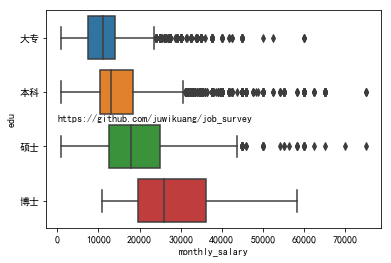

In [29]:

order=['大专','本科','硕士','博士']
a=sns.boxplot(y='edu',x='monthly_salary',order=order,data=data[data.edu.isin(order)], orient='h')
plt.annotate('https://github.com/juwikuang/job_survey', xy=(0.5,1.5), xytext=(2, 1.55))
plt.show()

# 工作经验 Working Experience

In [30]:
data_experience=get_sub_stats_by_col(data, 'experience')
apply_style(data_experience)

experience,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
10+,29981,12500,27500,60000,338,0.21%
5_10,20687,9000,19500,41667,16832,10.47%
3_5,15595,7000,13500,35000,44789,27.85%
no,11830,3000,10000,30000,52672,32.75%
1_3,11570,5000,10500,26612,46202,28.73%


In [31]:
salary_we_10=data[data.experience=='10+'].monthly_salary
salary_we_5_10=data[data.experience=='5_10'].monthly_salary
salary_we_3_5=data[data.experience=='3_5'].monthly_salary
salary_we_1_3=data[data.experience=='1_3'].monthly_salary
salary_we_no=data[data.experience=='no'].monthly_salary

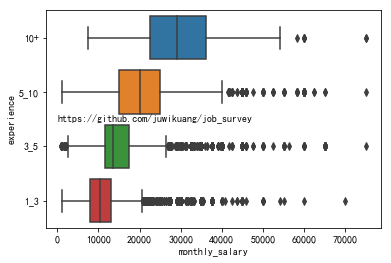

In [32]:

order=['10+','5_10','3_5','1_3']
sns.boxplot(y='experience',x='monthly_salary',order=order,data=data[data.experience.isin(order)], orient='h')
plt.annotate('https://github.com/juwikuang/job_survey', xy=(1.5,1.5), xytext=(1.55, 1.55))
plt.show()

# 公司 Company

## 公司性质 Company Type

In [33]:
data_company_type=get_sub_stats_by_col(data,'company_type')
apply_style(data_company_type)

company_type,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
外资（欧美）,16236,3750,15000,37500,7940,4.94%
合资,15227,4235,13500,32500,13491,8.39%
外企代表处,15182,7050,13083,29150,141,0.09%
外资（非欧美）,13996,3704,12500,30000,7770,4.83%
民营公司,13470,3750,12500,34500,117430,73.01%
国企,13443,5000,12500,27500,12261,7.62%
事业单位,13385,5069,12500,29167,1498,0.93%
非营利组织,9394,2729,10069,16500,116,0.07%
政府机关,8233,5250,7000,20833,186,0.12%


us_eu是欧美外企，startup是创业公司，listed是上市公司，state是国企，private是私企，foreign是非欧美外企，其他不足1000个样本的不管了。

## 公司规模 Company Size

In [34]:
data_company_size=get_sub_stats_by_col(data,'company_size')
apply_style(data_company_size)

company_size,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
10000+,18278,3500,15000,45000,7344,4.57%
,15860,5250,12500,50000,698,0.43%
5000-10000,15421,5250,15000,32010,3467,2.16%
500-1000人,15199,5000,12500,40000,16469,10.24%
1000-5000,14370,5000,12500,35000,20910,13.00%
150-500,13785,3750,12500,30500,33445,20.79%
50-150,13060,3750,12500,32500,48786,30.33%
50-,12344,3750,11500,30000,29714,18.48%


公司越大，工资越高

## 行业 Industry

In [35]:
data_industry=get_sub_stats_by_col(data,'industry')
apply_style(data_industry)

industry,salary_mean,salary_95_min,salary_median,salary_95_max,head_count,percentage
finance,15357,5211,14000,32500,5229,3.25%
service,14604,5000,12500,35393,958,0.60%
edu,14152,3750,12500,35000,10139,6.30%
trade,14137,5000,12500,35000,7340,4.56%
logistic,13938,5000,12500,30000,1830,1.14%
computer,13742,3750,12500,33750,124213,77.23%
realestate,13106,3750,12500,30000,1918,1.19%
,12929,12500,12929,14000,7,0.00%
gov,12854,3750,12000,29729,1859,1.16%
medical,12751,4500,11500,30000,3479,2.16%
